In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [2]:
#importing dataset 
data = pd.read_csv('PlayTennis.csv')
data.head()


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()
data=data.apply(string_to_int.fit_transform)


In [5]:
feature_cols = ['outlook', 'temp', 'humidity', 'windy']
X = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state= 40)
X_train

array([[1, 0, 1, 0],
       [2, 1, 0, 1],
       [0, 1, 0, 0],
       [1, 2, 1, 0],
       [2, 0, 1, 0],
       [1, 0, 1, 1],
       [2, 2, 0, 0],
       [0, 2, 0, 1],
       [0, 0, 1, 1]], dtype=int64)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.tree import DecisionTreeClassifier 
class_g= DecisionTreeClassifier()
class_g=class_g.fit(X_train,y_train)

C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [9]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", 
max_depth=3)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#prediction
y_pred = classifier.predict(X_test)
#Accuracy
from sklearn import metrics
print('Accuracy Score:', 
metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.6


C:\Users\sheem\Anaconda3\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[2, 0],
       [2, 1]], dtype=int64)

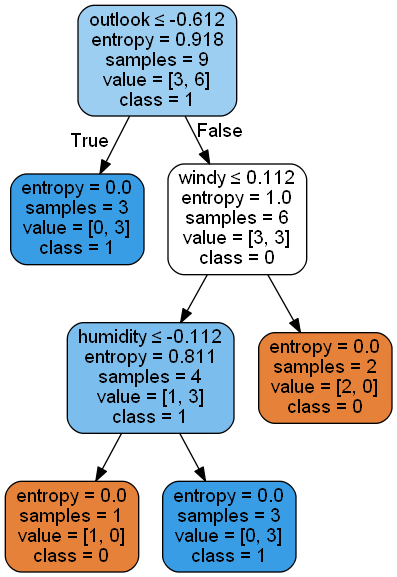

In [12]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
dot_data=StringIO()
export_graphviz(classifier, out_file=dot_data, 
 filled=True, rounded=True,
 special_characters=True,feature_names = 
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

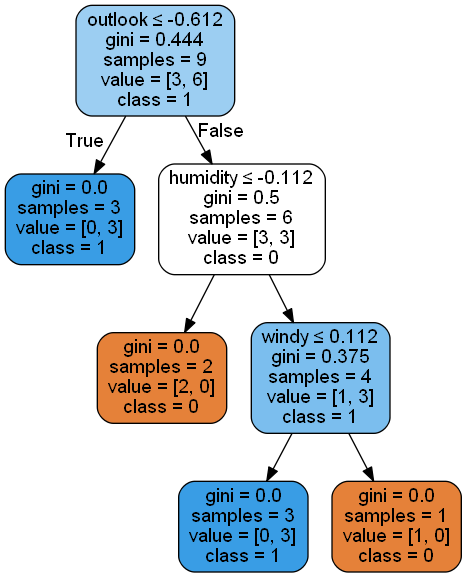

In [15]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
dot_data=StringIO()
export_graphviz(class_g, out_file=dot_data, 
 filled=True, rounded=True,
 special_characters=True,feature_names = 
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
